# IMDB Dataset of 50K Movie Reviews

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Data Exploration & Pre-processing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys  
sys.path.insert(0, '../src/')
from data.make_dataset import *#DataSet
from wordcloud import WordCloud
from collections import Counter
from features.build_features import Feature_extractor
from visualization.visualize import Visualizer
import matplotlib.image as mpimg
import joblib
from models.train_model import Experiment
from sklearn.model_selection import KFold

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Data Preprocessing and Cleaning

We randomly select a set of 10,000 reviews then, we need to clean the data, the following are the steps that were applied to the data:

1. Replace abbreviations, e.g : don't => do not 
2. Remove urls
3. Remove html tags
3. Remove special characters
5. Remove stop words
6. Encode label: positive = 1, negative = 0.
7. Stemming

In [2]:
df = pd.read_csv("../data/raw/IMDB Dataset.csv")

In [4]:
#"""
column_text = "review"
column_label = "sentiment"
class_labels = ["positive","negative"]
class_numbers = [1,0]

dataset = DataSet(df, column_text, column_label, class_labels, class_numbers)
#"""

Creating sample dataset....
Sample dataset created


In [5]:
dataset.df_dataset

,review,sentiment
0,"Another weak third-season entry, 'Is There In ...",negative
1,Aaah...The Thing.<br /><br />To see a horror f...,positive
2,"Martin Weisz, who directed the solid ""Rohtenbu...",negative
3,At the least some of the sitcoms that churn en...,negative
4,Well this movie is amazingly awful. I felt sor...,negative
...,...,...
9995,Spoilers. This review has been edited due to w...,positive
9996,I just saw this early this morning on the Fox ...,negative
9997,it's unfortunate that many of the other detrac...,negative
9998,Making this short and to the point. This movie...,positive


In [ ]:
# We save clean data without stop word and with stemming process applied
PATH_SAVE = "../data/intermediate/sample_dataset_cleaned_stemming.csv"
df_sample_dataset_stemming = dataset.data_preprocess(PATH_SAVE = PATH_SAVE)

In [ ]:
# We save clean data without stemming process to later be able to do a data exploration
PATH_SAVE = "../data/intermediate/sample_dataset_cleaned.csv"
df_sample_dataset_clean = dataset.data_preprocess(PATH_SAVE = PATH_SAVE,stemming=False,lemma=False)

# 2. Vectorization

Next, we need to represent our data in an array of numbers, in order to feed different models, we create 3 different representations:

1. Count Vectorizer: binary=False, 
2. Count Vectorizer: binary=True, In that case all zero entries will have 1. 
3. TF-IDF (Term frequency – Inverse document frequency)

In [16]:
PATH_SAVE = "../data/intermediate/sample_dataset_cleaned_stemming.csv"

In [17]:
df_data_cleaned = pd.read_csv(PATH_SAVE)

In [8]:
# Create Feature_extractor
column_text_name = "review"
column_label = "sentiment"
test_size=0.1

feature_extrator = Feature_extractor(df_data_cleaned,
                                     column_text_name,
                                     column_label,
                                     test_size)

In [9]:
#1.Representation CountVectorizer, Binary False
path_save_model = "../models/count_vector.pickel"
feature_extrator.create_countVectorizer(path_save_model)

In [10]:
#2.Representation CountVectorizer, Binary True
path_save_model = "../models/count_vector_binary.pickel"
feature_extrator.create_countVectorizer(path_save_model, binary=True)

In [11]:
#3.Representation TFIDF
path_save_model = "../models/tfidf_vector_50000.pickel"
feature_extrator.create_tfidf(path_save_model)

In [12]:
# 1.Data vectorizer in CountVectorizer, Binary False
# Shape of the CountVectorizer representation Binary False
feature_extrator.count_vector_train.shape,feature_extrator.count_vector_test.shape

((9000, 33087), (1000, 33087))

In [13]:
# 2.Data vectorizer in CountVectorizer, Binary True
# Shape of the CountVectorizer representation Binary True
feature_extrator.count_vector_train_bn.shape, feature_extrator.count_vector_test_bn.shape

((9000, 33087), (1000, 33087))

In [14]:
# 3. Data vectorizer TFIDF 
# Shape of the TFIDF representation Binary True
feature_extrator.tfidf_vector_train.shape, feature_extrator.tfidf_vector_test.shape

((9000, 33087), (1000, 33087))

# 3. Data Exploration

In [52]:
PATH_SAVE = "../data/intermediate/sample_dataset_cleaned.csv"

In [53]:
df_data = pd.read_csv(PATH_SAVE) # Read Data without Stemming

In [54]:
visualizer = Visualizer(df_data)

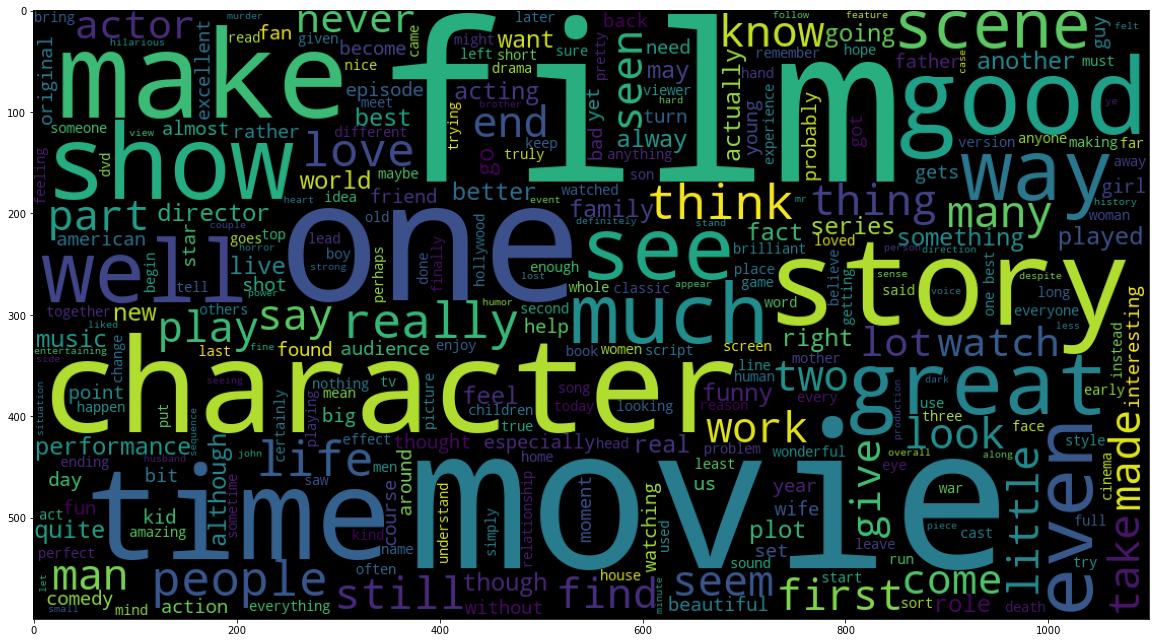

In [42]:
positive_corpus = visualizer.convert_array_to_text(1)
plt.imshow(visualizer.plot_word_cloud(positive_corpus))

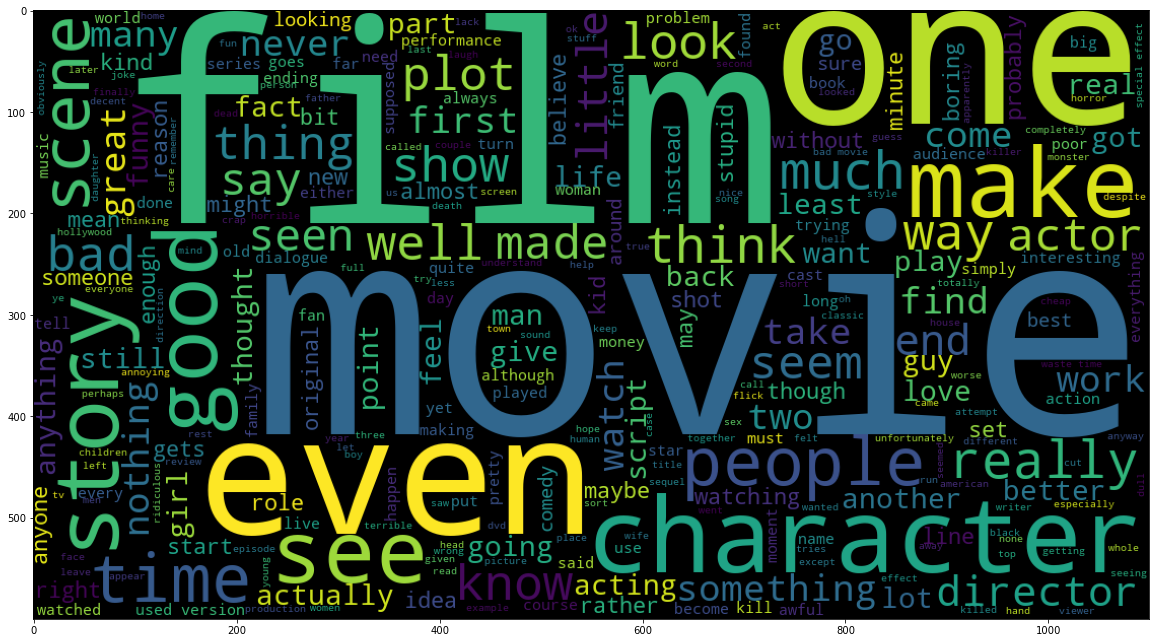

In [43]:
negative_corpus = visualizer.convert_array_to_text(0)
plt.imshow(visualizer.plot_word_cloud(negative_corpus))

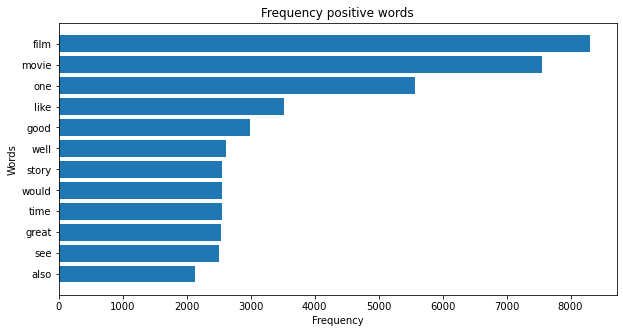

In [44]:
bar_plot_positive_word_frequency = visualizer.plot_frequency_words(positive_corpus, "positive", top=12, figsize=(10,5))

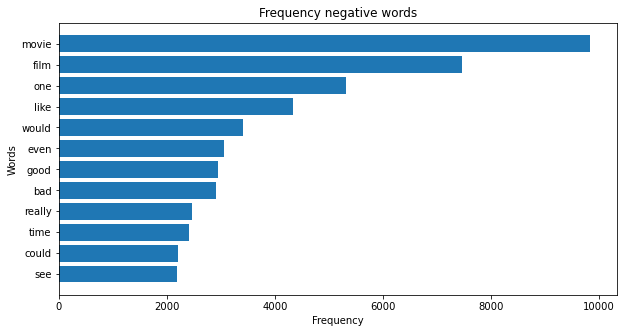

In [45]:
bar_plot_negative_word_frequency = visualizer.plot_frequency_words(negative_corpus, "negative", top=12, figsize=(10,5))

According to the data exploration we can conclude: 

1. The words: films, movie, one and like are the most common words for both positive and negative reviews as these are common words from the context of movie reviews.

2. Regarding positive reviews the words: good, well and great have a high frequency. 

3. Regarding the negative reviews the word bad is one of the most frequent.

## Model training

In this section you will build, train, evaluate and analyze the models that you propose. Please explain the process, choices and the behaviors of your models. 

**Answer.**

### About the experimentation process:

1. The reviews went through a cleaning process in which a Stemming process was applied to them.
2. The dataset was divided 90% for training, validation and 10% for testing.
3. We used a data set of 10,000.
4. The validation methodology K-Folds cross-validation with 10 Folds was used because the dataset was balanced.
5. Three different representations of the data were created: countVectorizer, countVectorizer with the binary parameter set to True and Term frequency - Inverse document frequency (TF-IDF).
6. models were tested: Logistic Regression, Multinomial NB, LinearSVC, Random Forest Classifier and KNeighbors Classifier, all of them were trained with different hyper-parameters, using a grid with the multiple combinations of them.
7. Number of experiments were: 3991


A python class was built which runs the experiments using as input a dataFrame that contains experiment information such as model name and hyper-parameters grid, the class creates gridSearch and runs the training and compute the metrics, which is saved in an excel file (metrics).

This way if I want to test a specific model I only have to add to the excel of experiments a new row with the name of the model and the grid of parameters that I want to test, this is very useful and scalable at the moment of doing many experiments.

In [44]:
# We load the file with the experiments
PATH_EXPERIMENTS = "../docs/experiments.xlsx"
df_experiments = pd.read_excel(PATH_EXPERIMENTS,index_col="id")
df_experiments

,model,parametres
id,,
1,LogisticRegression,"{'max_iter':[500],'C':[0.1,0.01,0.001,10,100]}"
2,MultinomialNB,"{'alpha':[0.1,0.2,0.4,0.6,0.8,1.0,3.0,2.0,2.5,..."
3,LinearSVC,"{'C':[0.1,0.01,0.001,10,100]}"
4,RandomForestClassifier,"{'max_depth': [2, 4, 6, 8,10],'n_estimators':[..."
5,KNeighborsClassifier,"{'n_neighbors':[1,3,5,7,9,11,15]}"
6,LinearSVC,"{'C':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.14,0..."
7,LinearSVC,"{'C':[0.19,0.192,0.194,0.196,0.198,0.199]}"
8,MultinomialNB,"{'alpha':[3.17,3.16,3.15,3.14,3.18,3.19]}"
9,LinearSVC,"{'C':[0.15,0.16,0.17]}"


In [29]:
# We load the file with the metrics
PATH_METRICS = "../reports/metrics.xlsx"
df_metrics = pd.read_excel(PATH_METRICS)

In [31]:
df_metrics

,experiment_id,data_representation,model_name,best_parametres,train_score,validation_score,test_score,path_confusion_matrix,path_pickel_model,number_fits
0,13,tfidf_stemming_ALL_Data,LinearSVC,{'C': 0.1},0.929089,0.894622,0.8970,../reports/confusions_matrix/tfidf_stemming_AL...,../models/tfidf_stemming_ALL_Data_LinearSVC_pa...,11
1,3,tfidf_stemming_ALL_Data,LinearSVC,{'C': 0.1},0.929089,0.894622,0.8970,../reports/confusions_matrix/tfidf_stemming_AL...,../models/tfidf_stemming_ALL_Data_LinearSVC_pa...,51
2,2,tfidf_stemming_ALL_Data,MultinomialNB,{'alpha': 0.8},0.898193,0.860044,0.8626,../reports/confusions_matrix/tfidf_stemming_AL...,../models/tfidf_stemming_ALL_Data_MultinomialN...,251
3,1,tfidf_stemming_ALL_Data,LogisticRegression,"{'C': 10, 'max_iter': 500}",0.975027,0.894889,0.8936,../reports/confusions_matrix/tfidf_stemming_AL...,../models/tfidf_stemming_ALL_Data_LogisticRegr...,51


### Experiments with TFIDF Representation

In [32]:
# We load the train,test data in TFIDF Representantio to run all expermiments

data_representation = "tfidf_stemming"

tfidf_train = feature_extrator.tfidf_vector_train
tfidf_test =  feature_extrator.tfidf_vector_test

train_labels = feature_extrator.train_data_label
test_labels = feature_extrator.test_data_label

In [33]:
tfidf_train.shape,tfidf_test.shape

((9000, 33087), (1000, 33087))

##################################################
Run experiment #: 1
Model => LogisticRegression
Parametres Grid: {'max_iter': [500], 'C': [0.1, 0.01, 0.001, 10, 100]}
Number of fits: 51
Running experiment.....
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Experiment runned with successfull
Metrics
train_score ==> 0.9945432098765432
validation_score ==> 0.8716666666666667
test_score ==> 0.862
Save experiment resources.....
Experiment executed successfully
##################################################
##################################################
Run experiment #: 2
Model => MultinomialNB
Parametres Grid: {'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 3.0, 2.0, 2.5, 2.7, 3.3, 3.5, 3.7, 4, 5, 6, 6.3, 6.5, 6.7, 6.8, 7, 7.1, 7.2, 7.5, 8]}
Number of fits: 251
Running experiment.....
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Experiment runned with successfull
Metrics
train_score ==> 0.9161851851851853
validation_score ==> 0.8501111111111112
test_scor

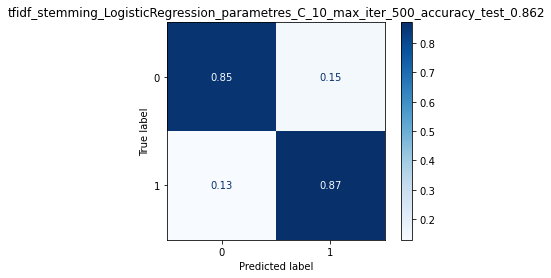

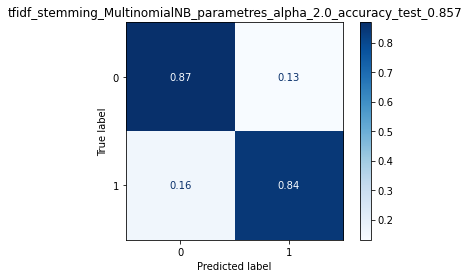

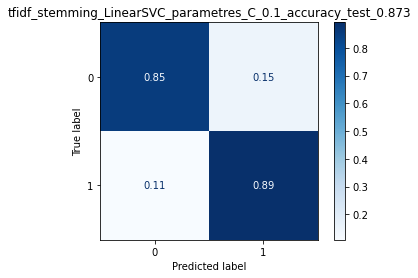

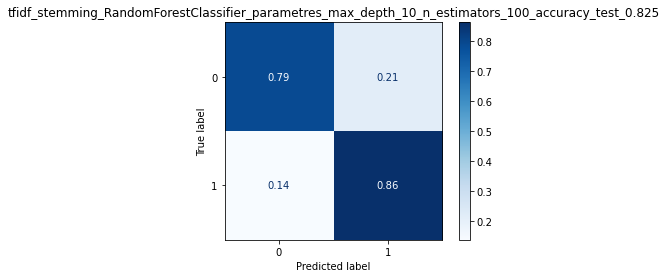

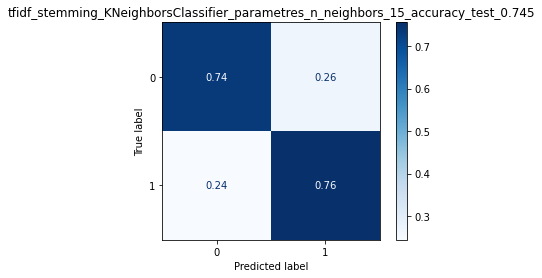

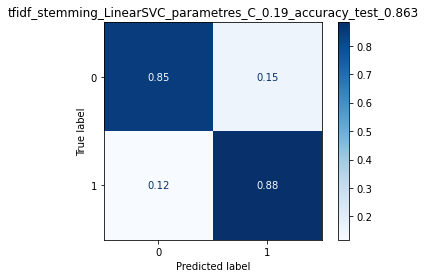

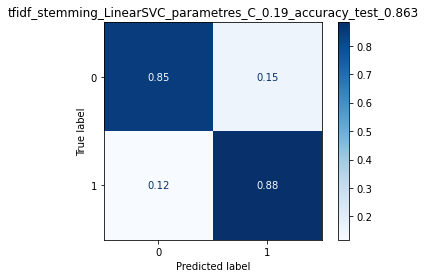

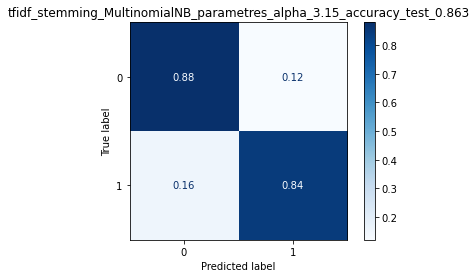

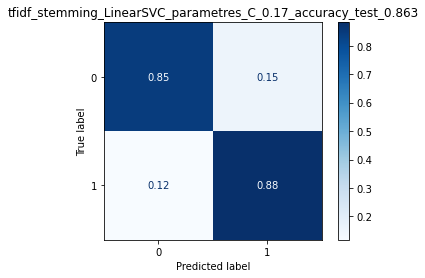

In [34]:
# We run all experiments using The TFIDF representation
for index,row in df_experiments.iterrows():    
    experiment = Experiment(df_experiments,PATH_METRICS,df_metrics,index,data_representation,tfidf_train,train_labels,tfidf_test,test_labels) 
    experiment.run_experiment()

### Experiments with countVectorizer Representation - binary True

In [35]:
# We load the train,test data in countVectorizer binary True Representantio to run all expermiments
data_representation = "countVectorizer_binary_stemming" 
count_vectorizer_bn_train = feature_extrator.count_vector_train_bn
count_vectorizer_bn_test =  feature_extrator.count_vector_test_bn

In [36]:
count_vectorizer_bn_train.shape

(9000, 33087)

##################################################
Run experiment #: 1
Model => LogisticRegression
Parametres Grid: {'max_iter': [500], 'C': [0.1, 0.01, 0.001, 10, 100]}
Number of fits: 51
Running experiment.....
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Experiment runned with successfull
Metrics
train_score ==> 0.969037037037037
validation_score ==> 0.8656666666666666
test_score ==> 0.863
Save experiment resources.....
Experiment executed successfully
##################################################
##################################################
Run experiment #: 2
Model => MultinomialNB
Parametres Grid: {'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 3.0, 2.0, 2.5, 2.7, 3.3, 3.5, 3.7, 4, 5, 6, 6.3, 6.5, 6.7, 6.8, 7, 7.1, 7.2, 7.5, 8]}
Number of fits: 251
Running experiment.....
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Experiment runned with successfull
Metrics
train_score ==> 0.9018641975308641
validation_score ==> 0.8502222222222222
test_score

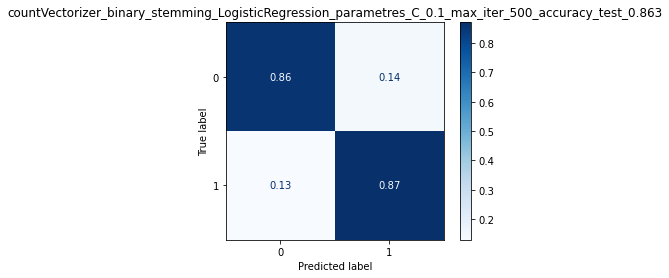

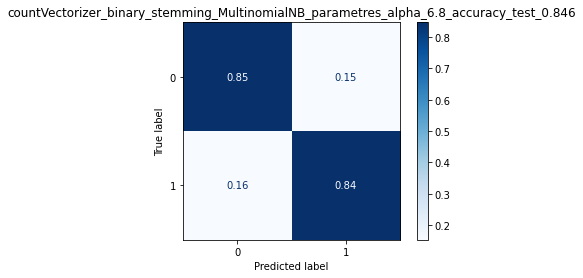

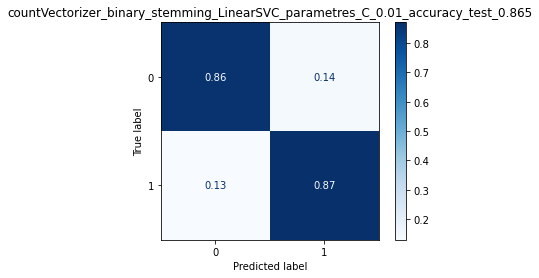

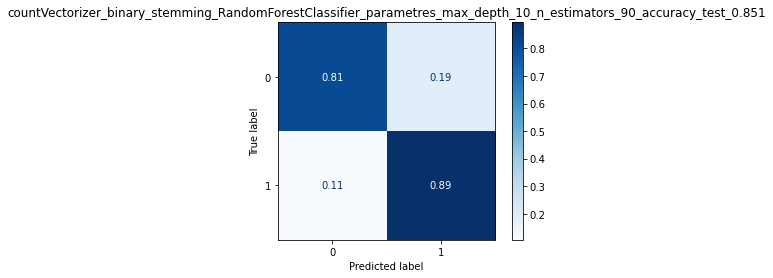

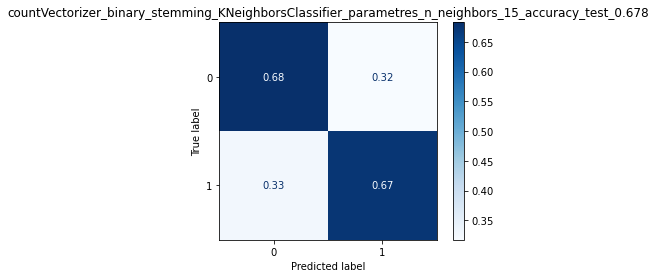

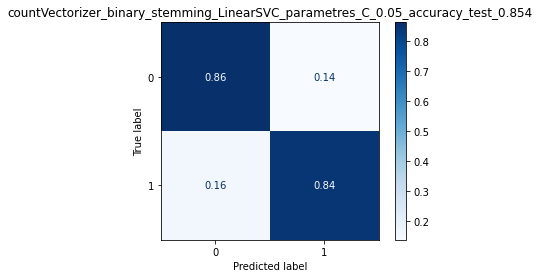

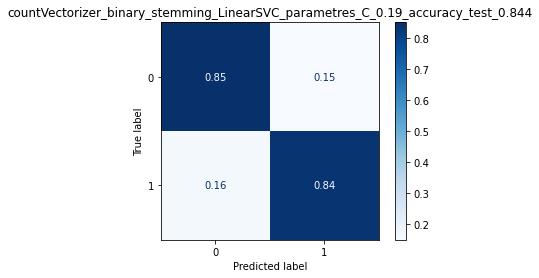

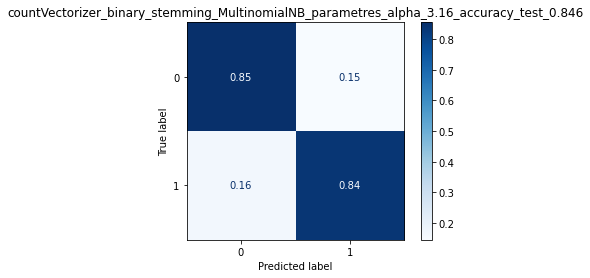

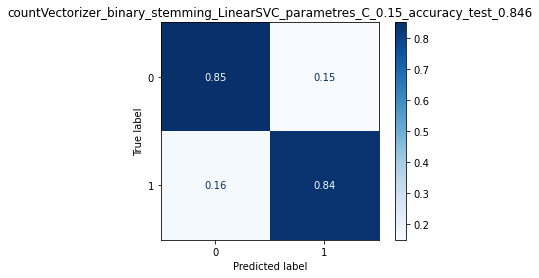

In [37]:
# We run all experiments using The countVectorizer representation binary True 
for index,row in df_experiments.iterrows():    
    experiment = Experiment(df_experiments,PATH_METRICS,df_metrics,index,data_representation,count_vectorizer_bn_train,train_labels,count_vectorizer_bn_test,test_labels) 
    experiment.run_experiment()

### Experiments with countVectorizer Representation - binary False

In [38]:
# We load the train,test data in countVectorizer binary False Representantio to run all expermiments
data_representation = "countVectorizer_stemming" 

count_vectorizer_train = feature_extrator.count_vector_train
count_vectorizer_test =  feature_extrator.count_vector_test


##################################################
Run experiment #: 1
Model => LogisticRegression
Parametres Grid: {'max_iter': [500], 'C': [0.1, 0.01, 0.001, 10, 100]}
Number of fits: 51
Running experiment.....
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Experiment runned with successfull
Metrics
train_score ==> 0.9775679012345678
validation_score ==> 0.865
test_score ==> 0.853
Save experiment resources.....
Experiment executed successfully
##################################################
##################################################
Run experiment #: 2
Model => MultinomialNB
Parametres Grid: {'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 3.0, 2.0, 2.5, 2.7, 3.3, 3.5, 3.7, 4, 5, 6, 6.3, 6.5, 6.7, 6.8, 7, 7.1, 7.2, 7.5, 8]}
Number of fits: 251
Running experiment.....
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Experiment runned with successfull
Metrics
train_score ==> 0.9016913580246915
validation_score ==> 0.8476666666666667
test_score ==> 0.847
S

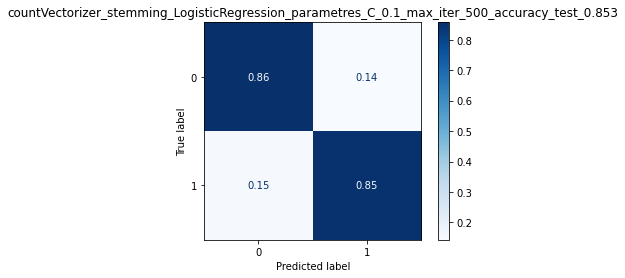

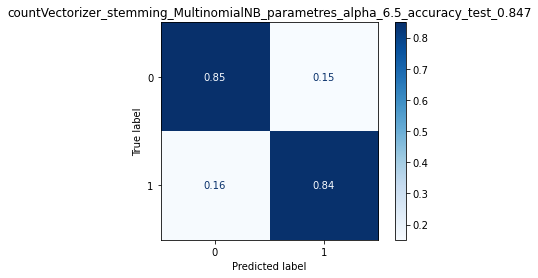

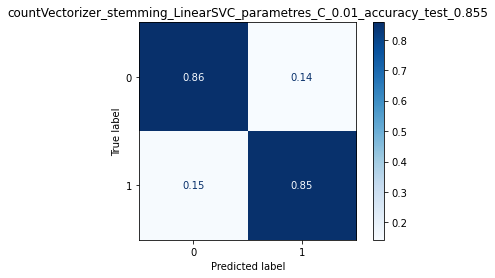

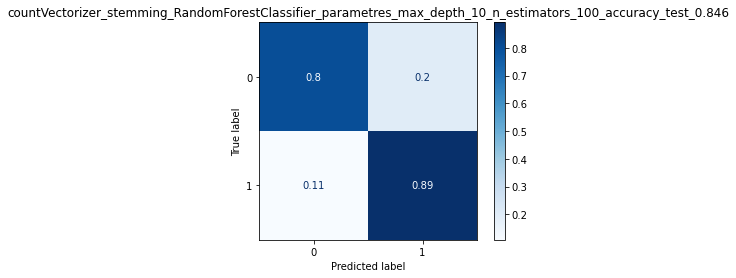

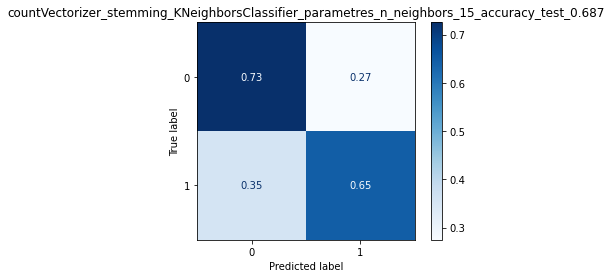

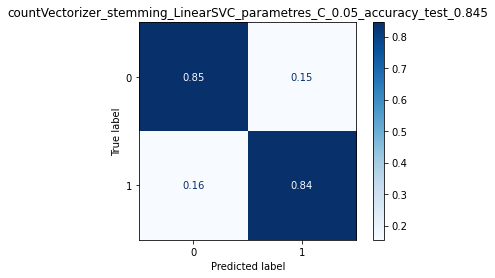

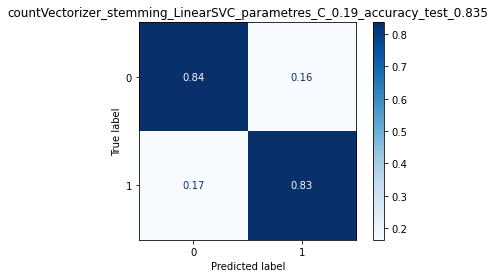

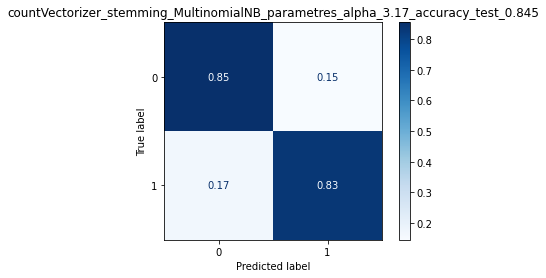

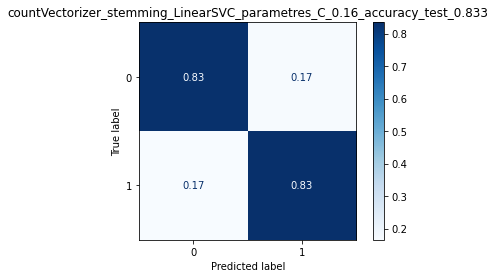

In [39]:
# We run all experiments using The countVectorizer representation binary False
for index,row in df_experiments.iterrows():    
    experiment = Experiment(df_experiments,PATH_METRICS,df_metrics,index,data_representation,count_vectorizer_train,train_labels,count_vectorizer_test,test_labels) 
    experiment.run_experiment()

## Results

The client now requires you to explain your results and a roadmap to improve your models. Additionally, describe in your own words what you would do to deploy your model in a Cloud Platform

**Answer.**

The dataFrame named ""df_metrics"" are the results of the experiments, information such as:

1. Model name
2. Best combination of parameters
3. Train_score, validation_score, test_score
4. The path where the confusion matrix and the model are saved in pkl format.


In [45]:
PATH_METRICS = "../reports/metrics.xlsx"
df_metrics = pd.read_excel(PATH_METRICS)
df_metrics

,experiment_id,data_representation,model_name,best_parametres,train_score,validation_score,test_score,path_confusion_matrix,path_pickel_model,number_fits
0,1,tfidf_stemming,LogisticRegression,"{'C': 10, 'max_iter': 500}",0.994543,0.871667,0.8620,../reports/confusions_matrix/tfidf_stemming_Lo...,../models/tfidf_stemming_LogisticRegression_pa...,51
1,2,tfidf_stemming,MultinomialNB,{'alpha': 2.0},0.916185,0.850111,0.8570,../reports/confusions_matrix/tfidf_stemming_Mu...,../models/tfidf_stemming_MultinomialNB_paramet...,251
2,3,tfidf_stemming,LinearSVC,{'C': 0.1},0.939914,0.870444,0.8730,../reports/confusions_matrix/tfidf_stemming_Li...,../models/tfidf_stemming_LinearSVC_parametres_...,51
3,4,tfidf_stemming,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 100}",0.906062,0.823000,0.8250,../reports/confusions_matrix/tfidf_stemming_Ra...,../models/tfidf_stemming_RandomForestClassifie...,501
4,5,tfidf_stemming,KNeighborsClassifier,{'n_neighbors': 15},0.807173,0.760667,0.7450,../reports/confusions_matrix/tfidf_stemming_KN...,../models/tfidf_stemming_KNeighborsClassifier_...,71
5,6,tfidf_stemming,LinearSVC,{'C': 0.19},0.960321,0.873444,0.8630,../reports/confusions_matrix/tfidf_stemming_Li...,../models/tfidf_stemming_LinearSVC_parametres_...,131
6,7,tfidf_stemming,LinearSVC,{'C': 0.19},0.960321,0.873444,0.8630,../reports/confusions_matrix/tfidf_stemming_Li...,../models/tfidf_stemming_LinearSVC_parametres_...,61
7,8,tfidf_stemming,MultinomialNB,{'alpha': 3.15},0.907827,0.849000,0.8630,../reports/confusions_matrix/tfidf_stemming_Mu...,../models/tfidf_stemming_MultinomialNB_paramet...,61
8,9,tfidf_stemming,LinearSVC,{'C': 0.17},0.955864,0.873222,0.8630,../reports/confusions_matrix/tfidf_stemming_Li...,../models/tfidf_stemming_LinearSVC_parametres_...,31
9,1,countVectorizer_binary_stemming,LogisticRegression,"{'C': 0.1, 'max_iter': 500}",0.969037,0.865667,0.8630,../reports/confusions_matrix/countVectorizer_b...,../models/countVectorizer_binary_stemming_Logi...,51


In [46]:
experiments_numbers = df_metrics["number_fits"].sum()

print("Number of experiments were: "+str(experiments_numbers))

Number of experiments were: 3991


### Best model

The model with the best metrics wash the **TF-IDF representation** and was the **Linear SVC model** with a regularization parameter C equal to 0.1, with this model an accuracy of **94%** was achieved during the **training** process, **87%** during the **validation** and **87%** during the **test**, however we could **improve** its performance by applying different strategies, which we will mention later.

In [48]:
df_metrics[2:3]

,experiment_id,data_representation,model_name,best_parametres,train_score,validation_score,test_score,path_confusion_matrix,path_pickel_model,number_fits
2,3,tfidf_stemming,LinearSVC,{'C': 0.1},0.939914,0.870444,0.873,../reports/confusions_matrix/tfidf_stemming_Li...,../models/tfidf_stemming_LinearSVC_parametres_...,51


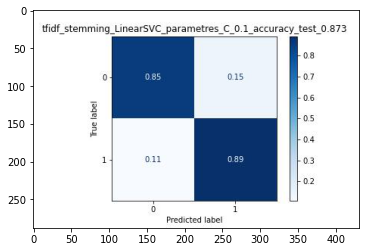

In [49]:
img = mpimg.imread('../reports/confusions_matrix/tfidf_stemming_LinearSVC_parametres_C_0.1_accuracy_test_0.873_cm.jpg')
plt.imshow(img)

Now let's look at the behavior of this model by modifying the number of samples, for this purpose we construct the learning curve 

In [50]:
best_model_linearSVC = joblib.load("../models/tfidf_stemming_LinearSVC_parametres_C_0.1_accuracy_test_0.873.pkl")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

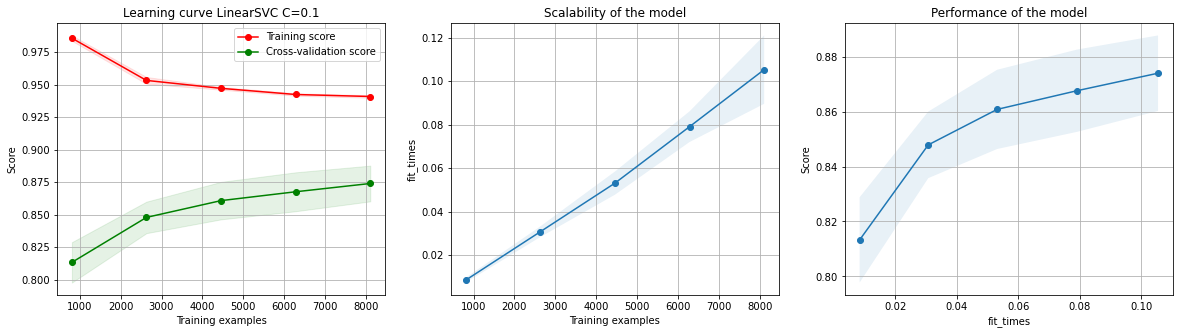

In [58]:
cv = KFold(n_splits=10) 
visualizer.plot_learning_curve(best_model_linearSVC, "Learning curve LinearSVC C=0.1", tfidf_train, train_labels, axes=None, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


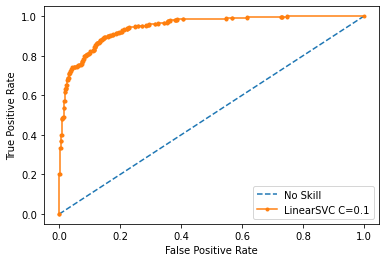

In [67]:
probs = best_model_linearSVC._predict_proba_lr(tfidf_test) #
visualizer.plot_roc(tfidf_test, test_labels, probs, 'LinearSVC C=0.1')

As can be seen, the validation and training curves tend to get closer if the number of samples is increased, therefore it is suggested to increase the number of samples. On the other hand, this model obtains an AUC of 0.94 which is a good value, however there is a big difference between the training and validation scores through the number of samples, which gives us indications of a possible overfitting of the model.

After plotting the learning curve of other models, it was found that the MultinomialNB model presents a more compact behavior (less overfitting) even though it obtains less score, however, I choose this model because I consider more important that the model decreases the overfitting.

In [72]:
df_metrics[7:8]

,experiment_id,data_representation,model_name,best_parametres,train_score,validation_score,test_score,path_confusion_matrix,path_pickel_model,number_fits
7,8,tfidf_stemming,MultinomialNB,{'alpha': 3.15},0.907827,0.849,0.863,../reports/confusions_matrix/tfidf_stemming_Mu...,../models/tfidf_stemming_MultinomialNB_paramet...,61


In [68]:
multinomialNB = joblib.load("../models/tfidf_stemming_MultinomialNB_parametres_alpha_3.15_accuracy_test_0.863.pkl")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

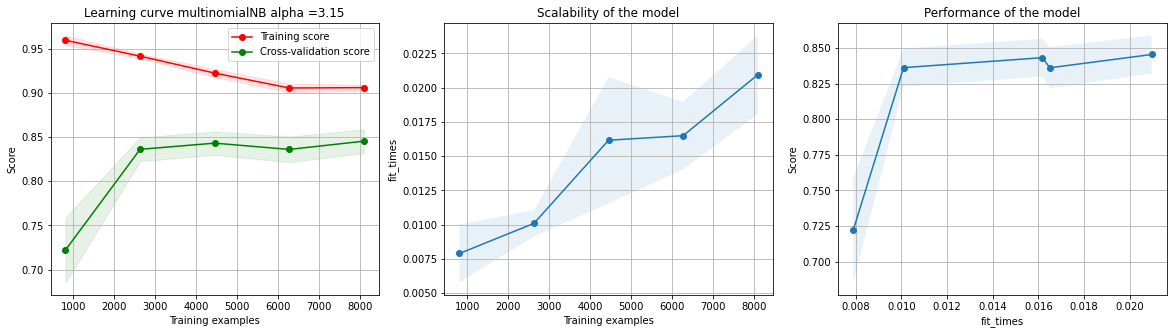

In [69]:
visualizer.plot_learning_curve(multinomialNB, "Learning curve multinomialNB alpha =3.15", tfidf_train, train_labels, axes=None, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


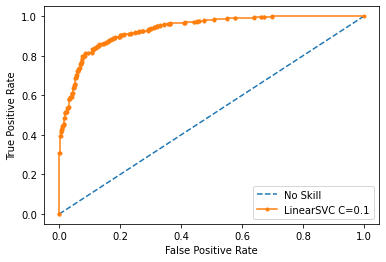

In [70]:
probs = multinomialNB.predict_proba(tfidf_test) #
visualizer.plot_roc(tfidf_test, test_labels, probs, 'LinearSVC C=0.1')

 # Roadmap to improve the model

To improve the model I suggest the following: 

- Increase the amount of dataset data. 
- Make a more exhaustive search of hyperparameters using a random gridSearch.
- Use Best Matching 25 (BM25) which is an improvement of TFIDF to represent the data.
- Use a word embedding such as: word2vec or doc2vec to represent the data, you can use a pre-trained word embedding or train your own word embedding.
- Use state of the art pre-trained models such as: BERT, RoBERTa, ELMo, BART, etc. Performing fine tuning on their latest capabilities.
- Use recurrent networks as LSTM.

#### By

Jose Alberto Arango S.